<a id="1"></a>
# <div style="text-align:center; padding:20px;color:white;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>🥑Avocado📈EDA and ML Prediction💡</b></div>

![](https://media-cldnry.s-nbcnews.com/image/upload/t_fit-760w,f_auto,q_auto:best/rockcms/2022-08/avocado-te-220829-f60e6b.jpg)

<a id="1"></a>
# <div style="text-align:center; padding:20px;color:white;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>0. Introduction</b></div>

<a id="1"></a>
<div style="font-size:20px"><b>Avocado</b>,<br> Considered a superfood for its nutritional value and versatility, has gained significant popularity in recent years, <br>leading to dynamic fluctuations in its market price. Understanding and accurately predicting avocado prices are crucial for various stakeholders, including growers, distributors, retailers, and consumers.<br> In this report, we delve into the intricacies of avocado price prediction using machine learning techniques. <br>By analyzing historical data and identifying key factors influencing avocado prices,<br> we aim to develop robust predictive models that can offer valuable insights into future price trends.<br> Through this study, we seek to enhance decision-making processes and optimize strategies within the avocado market ecosystem.</div>


<a id="1"></a>
<div style="text-align:center;font-size:20px"><b>Contents Of Table</b><br>0. Introduction<br>1. Import Libraries<br>2. EDA<br>3. Preprocessing & Feature Engineering<br>4. Feature Selection<br>5. Predict</div>

<a id="1"></a>
# <div style="text-align:center; padding:20px;color:white;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>1. Import Libraries</b></div>

In [3]:
# visualization tool
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

# Modeling tool
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv("data/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<Axes: >

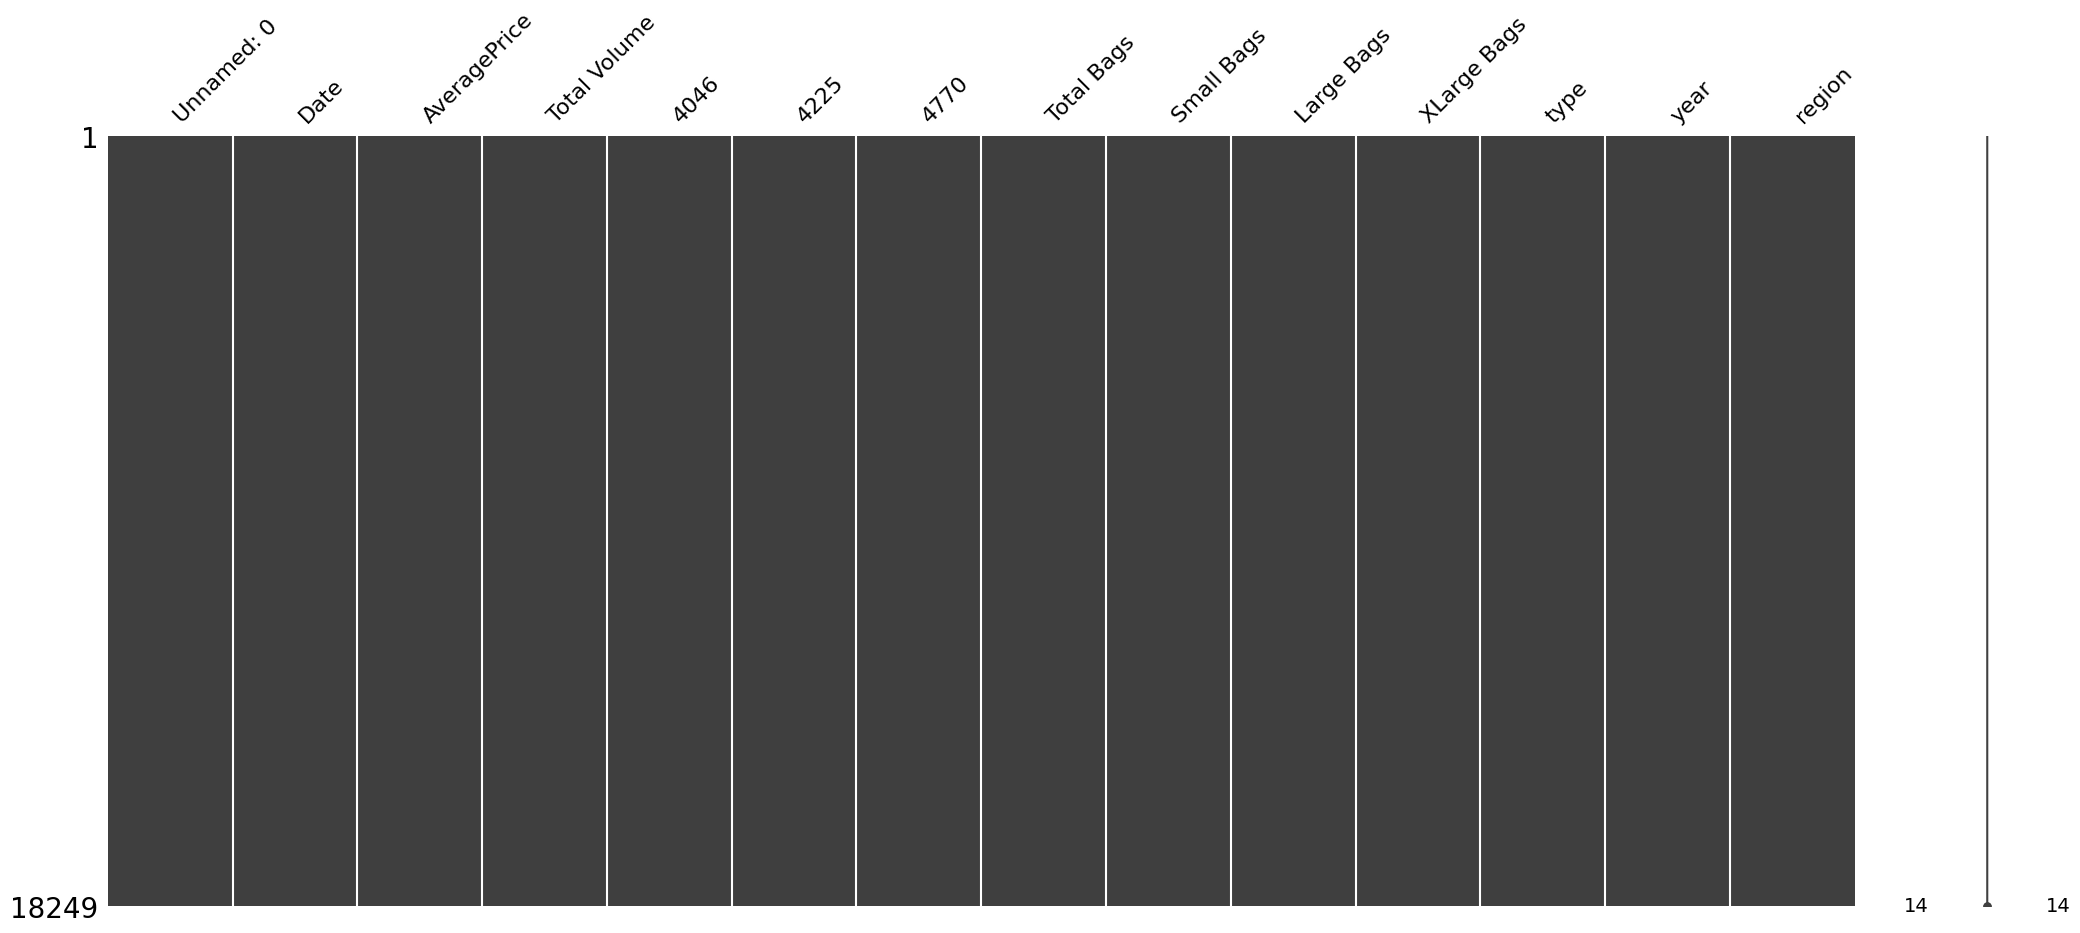

In [5]:
msno.matrix(df)

In [6]:
df = df.drop(columns = ['Unnamed: 0'],axis=1)
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<a id="1"></a>
# <div style="text-align:center; padding:20px;color:white;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>2. EDA</b></div>

In [7]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

<a id="1"></a>
## <div style="padding:10px;color:white;margin:0;font-size:30px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>Each Factors' average value by each Date</b></div>


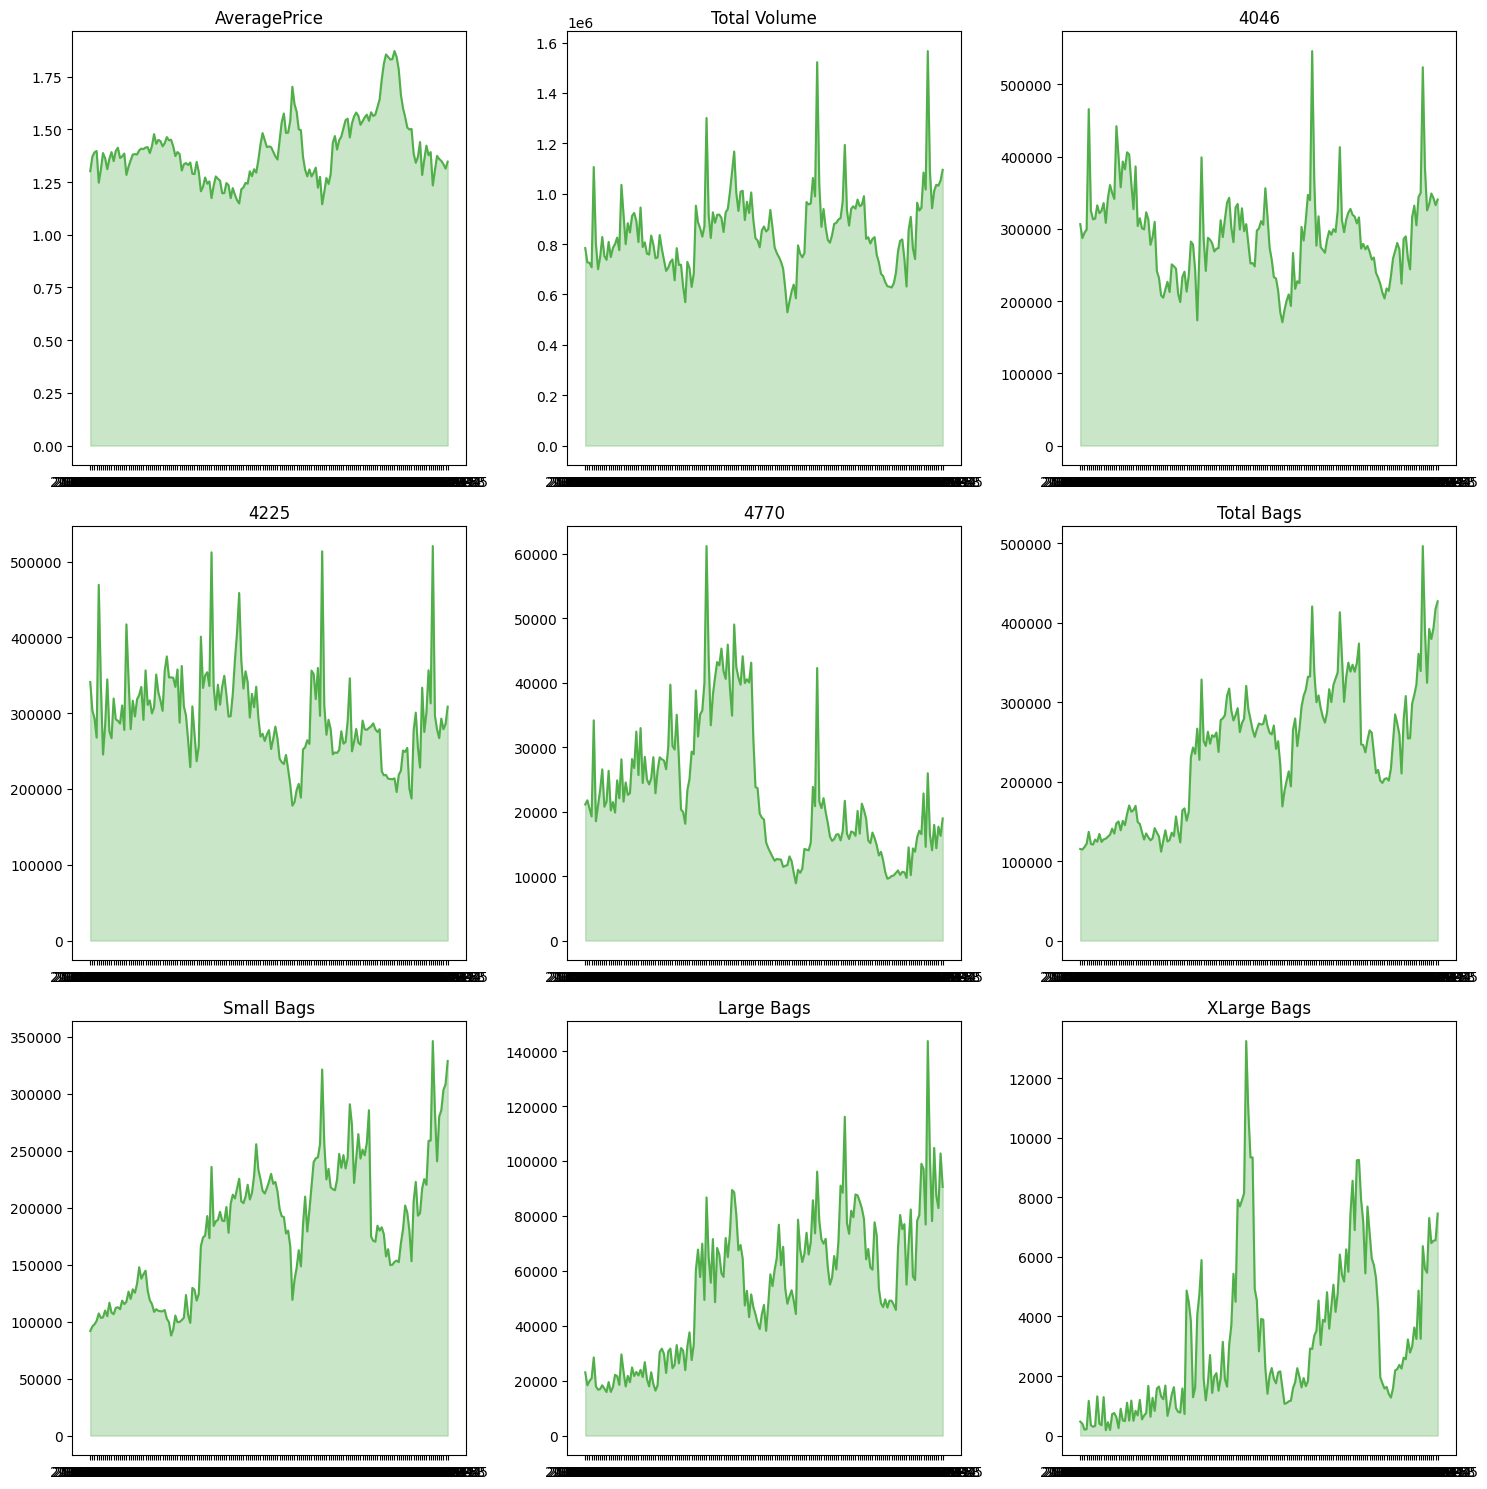

In [8]:
cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
x = df['Date'].sort_values().unique()
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
for i, col in enumerate(cols):
    y = [np.mean(df[df['Date'] == date][col]) for date in x]
    ax = axes[i]
    ax.plot(x, y, color="#50AF49", label=col)
    ax.fill_between(x, 0, y, color="#50AF49", alpha=0.3)
    ax.set_title(col)
plt.tight_layout()
plt.show()

<a id="1"></a>
## <div style="padding:10px;color:white;margin:0;font-size:30px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>Conventional - Organic balance by each Country</b></div>


In [9]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

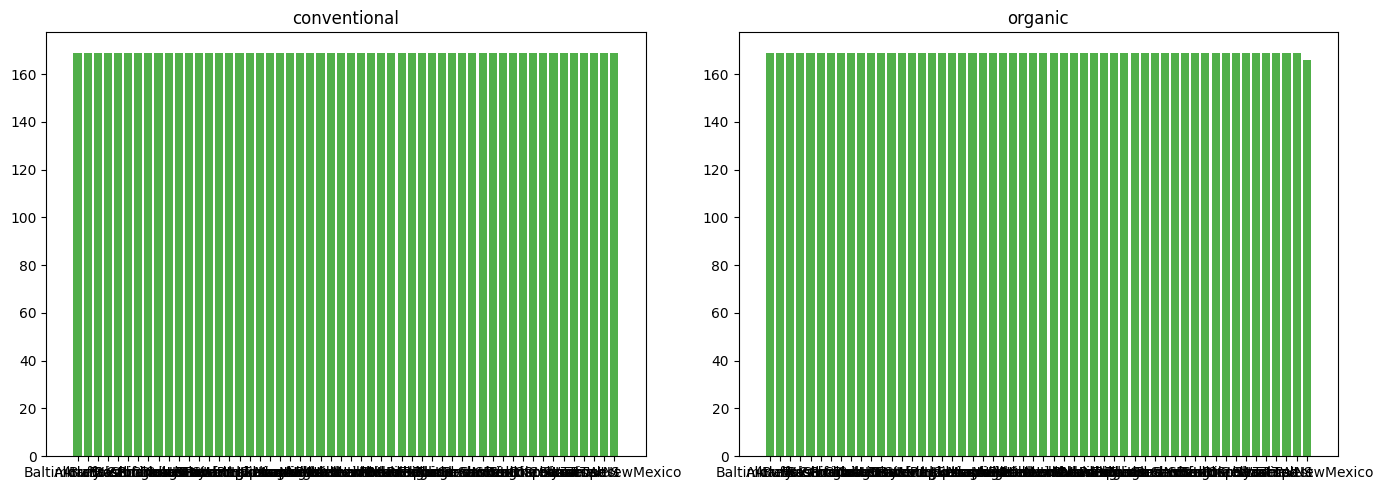

In [10]:
type1 = df['type'].value_counts().index[0]
type2 = df['type'].value_counts().index[1]
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
dt1 = df[df['type'] == type1]['region'].value_counts()
axes[0].bar(dt1.index, dt1.values,color="#50AF49")
axes[0].set_title(type1)
dt2 = df[df['type'] == type2]['region'].value_counts()
axes[1].bar(dt2.index, dt2.values,color='#50AF49')
axes[1].set_title(type2)
plt.tight_layout()
plt.show()

It can be seen that the conventional and organic ratio of the data are almost constant, which can be good for machine learning when learning.

<a id="1"></a>
## <div style="padding:10px;color:white;margin:0;font-size:30px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>The relationship between Average Price and each Facors'
</b></div>

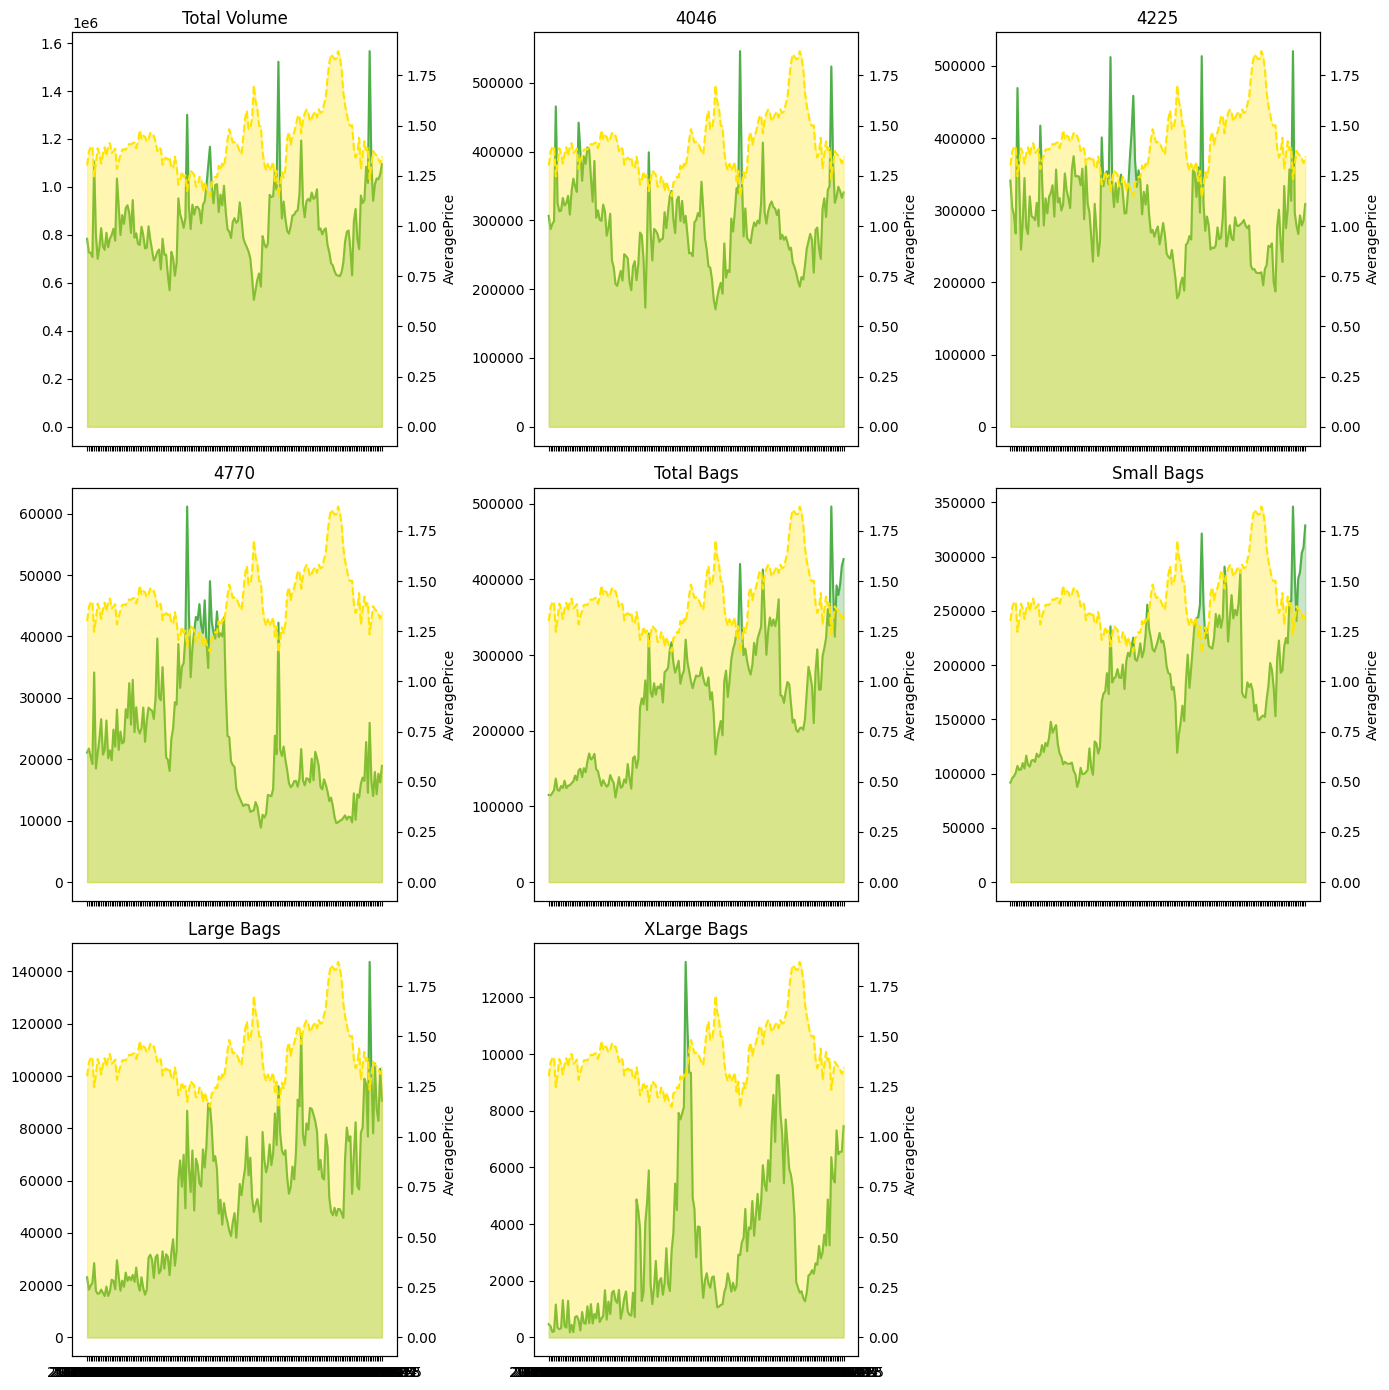

In [11]:
cols = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
x = df['Date'].sort_values().unique()
fig, axes = plt.subplots(3, 3, figsize=(14, 14), sharex=True)
axes = axes.flatten()
axes[-1].axis('off')
for i, col in enumerate(cols):
    y = [np.mean(df[df['Date'] == date][col]) for date in x]
    ax = axes[i]
    ax_right = ax.twinx()
    ax_right.plot(x, df.groupby('Date')['AveragePrice'].mean(), color='#FFE400', linestyle='dashed', label='AveragePrice')
    ax_right.fill_between(x, 0, df.groupby('Date')['AveragePrice'].mean(), color="#FFE400", alpha=0.3)
    ax_right.set_ylabel('AveragePrice', color="#000000")
    ax_right.tick_params(axis='y', labelcolor="#000000")
    ax.plot(x, y, color="#50AF49", label=col)
    ax.fill_between(x, 0, y, color="#50AF49", alpha=0.3)
    ax.set_title(col)
plt.tight_layout()
plt.show()

By visualizing the average price and other factors on a grid, the relationship between the two factors can be observed more intuitively. Through the visualization results, it can be seen that as the average price of avocado decreases, the sales volume increases, and conversely, as the average price of avocado increases, the sales volume of each factor decreases. Through this, it can be expected to be negative when analyzing the correlation between the average price and each factor.

<a id="1"></a>
# <div style="text-align:center; padding:20px;color:white;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>3. Preprocessing & Feature Engineering</b></div>

In the data pre-processing stage, we will continue to analyze data by digitizing data in the form of strings that even EDA could not do, and in particular, we will proceed with more detailed analysis of date data. In addition, we plan to convert it into a more advantageous form for machine learning by performing scaling with outliers.

In [12]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


<a id="1"></a>
## <div style="padding:10px;color:white;margin:0;font-size:30px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>Mapping
</b></div>

In [13]:
df['type'] = df['type'].replace({'conventional': 1, 'organic': 2})
region_mapping = {
    'Albany': 1,
    'Sacramento': 2,
    'Northeast': 3,
    'NorthernNewEngland': 4,
    'Orlando': 5,
    'Philadelphia': 6,
    'PhoenixTucson': 7,
    'Pittsburgh': 8,
    'Plains': 9,
    'Portland': 10,
    'RaleighGreensboro': 11,
    'RichmondNorfolk': 12,
    'Roanoke': 13,
    'SanDiego': 14,
    'Atlanta': 15,
    'SanFrancisco': 16,
    'Seattle': 17,
    'SouthCarolina': 18,
    'SouthCentral': 19,
    'Southeast': 20,
    'Spokane': 21,
    'StLouis': 22,
    'Syracuse': 23,
    'Tampa': 24,
    'TotalUS': 25,
    'West': 26,
    'NewYork': 27,
    'NewOrleansMobile': 28,
    'Nashville': 29,
    'Midsouth': 30,
    'BaltimoreWashington': 31,
    'Boise': 32,
    'Boston': 33,
    'BuffaloRochester': 34,
    'California': 35,
    'Charlotte': 36,
    'Chicago': 37,
    'CincinnatiDayton': 38,
    'Columbus': 39,
    'DallasFtWorth': 40,
    'Denver': 41,
    'Detroit': 42,
    'GrandRapids': 43,
    'GreatLakes': 44,
    'HarrisburgScranton': 45,
    'HartfordSpringfield': 46,
    'Houston': 47,
    'Indianapolis': 48,
    'Jacksonville': 49,
    'LasVegas': 50,
    'LosAngeles': 51,
    'Louisville': 52,
    'MiamiFtLauderdale': 53,
    'WestTexNewMexico': 54
}

# Apply the mapping to the 'region' column
df['region'] = df['region'].map(region_mapping)

df['month'] = df['Date'].apply(lambda x: int(x.split('-')[1]))
df['day'] = df['Date'].apply(lambda x: int(x.split('-')[2]))
df = df.drop(columns = ['Date'],axis=1)
df

C:\Users\dhfuc\AppData\Local\Temp\ipykernel_13720\2454718434.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['type'] = df['type'].replace({'conventional': 1, 'organic': 2})


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,1,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,1,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,1,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,1,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,1,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2,2018,54,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2,2018,54,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2,2018,54,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2,2018,54,1,14


### Mapping EDA

#### Average monthly price for each year

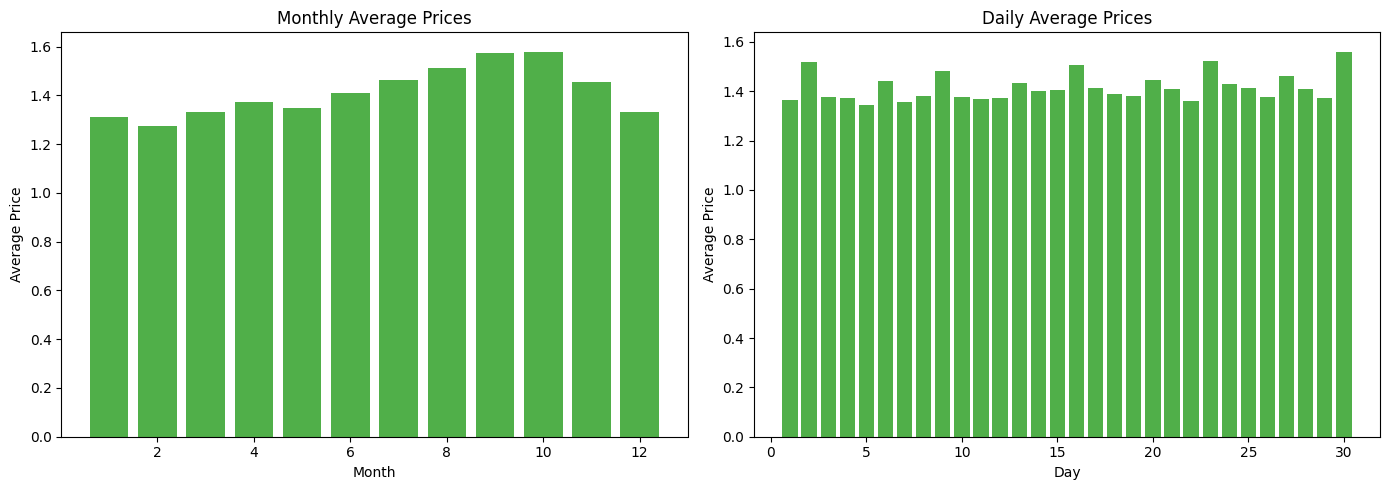

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
x_monthly = [i for i in range(1, 13)]
y_monthly = [np.mean(df[df['month'] == i]['AveragePrice']) for i in x_monthly]
axes[0].bar(x_monthly, y_monthly,color="#50AF49")
axes[0].set_title('Monthly Average Prices')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Average Price')
x_daily = [i for i in range(1, 31)]
y_daily = [np.mean(df[df['day'] == i]['AveragePrice']) for i in x_daily]
axes[1].bar(x_daily, y_daily,color="#50AF49")
axes[1].set_title('Daily Average Prices')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Average Price')
plt.tight_layout()
plt.show()

([<matplotlib.axis.XTick at 0x15618c56f00>,
 [Text(1, 0, 'Total Volume'),
  Text(2, 0, '4046'),
  Text(3, 0, '4225'),
  Text(4, 0, '4770'),
  Text(5, 0, 'Total Bags'),
  Text(6, 0, 'Small Bags'),
  Text(7, 0, 'Large Bags'),
  Text(8, 0, 'XLarge Bags')])

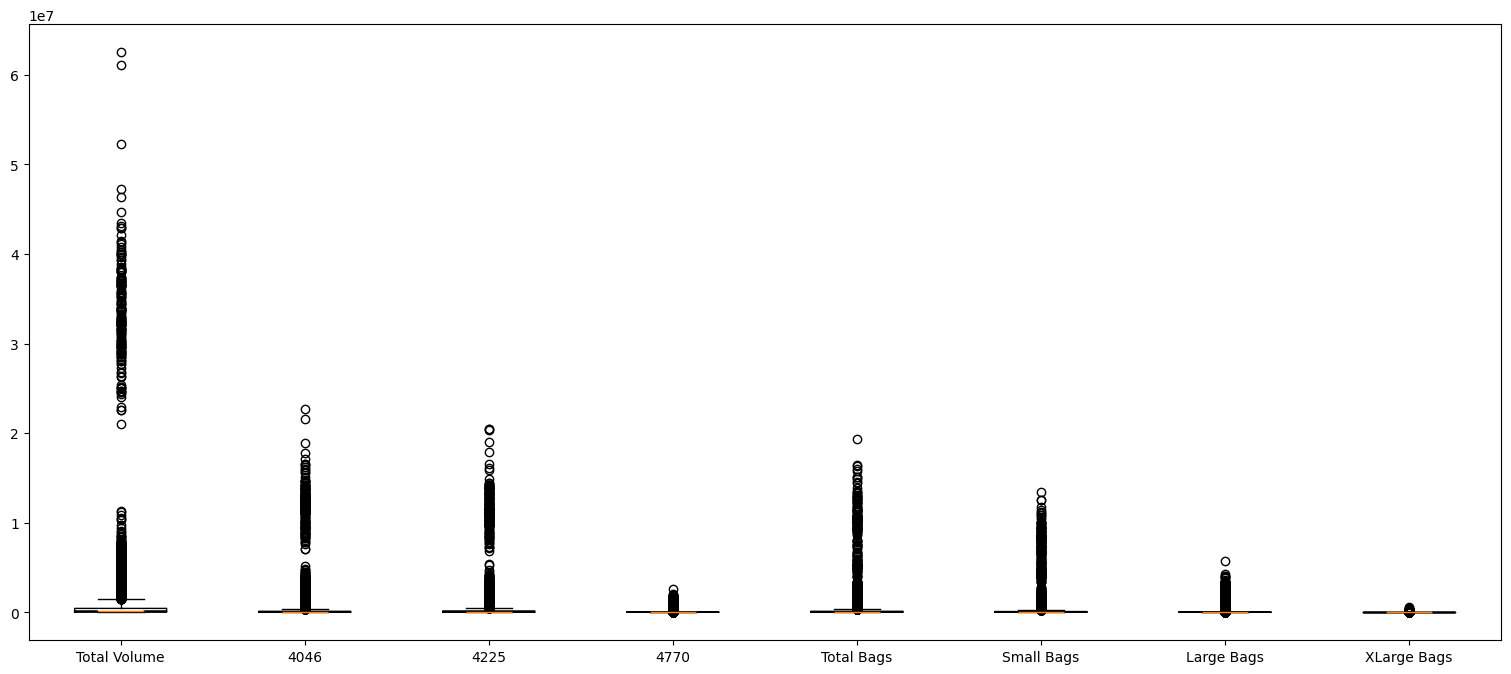

In [15]:
x = cols
y = []
for i in x:
    y.append(df[i].values.tolist())
plt.figure(figsize=(19,8))
plt.boxplot(y,notch=True, whis=2.5)
plt.xticks([i for i in range(1,len(x)+1)], x)

In [16]:
cols

['Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags']

In [17]:
def Zscore_outlier(df): # Thanks to: https://www.kaggle.com/code/nareshbhat/outlier-the-silent-killer
    out = []
    m = np.mean(df)
    sd = np.std(df)
    for i in df: 
        z = (i-m)/sd
        if np.abs(z) > 3: 
            out.append(i)
    print("Outliers:",out)
    
for i,col in enumerate(cols): 
    print(cols[i])
    Zscore_outlier(df[col])
    print("\n")

Total Volume
Outliers: [27297983.67, 25083647.17, 28041335.38, 28800396.57, 22617999.38, 25114228.11, 28597756.27, 28485715.97, 31047484.27, 26240072.11, 29375123.6, 29216198.15, 28243505.52, 27753508.14, 29569086.56, 31245835.65, 33526480.08, 29761638.48, 29699845.61, 31936856.18, 33254911.87, 30358467.88, 30652211.08, 32324647.66, 31660031.68, 37943670.34, 32408705.7, 35734613.9, 37026085.75, 36549995.66, 33720159.09, 35344183.15, 32027686.15, 36400886.58, 41291704.39, 30894157.8, 33091256.26, 32046401.64, 31500669.44, 29982648.43, 32513550.51, 29572225.71, 30094698.85, 32994014.16, 29936729.76, 28012520.93, 32137333.01, 44655461.51, 28470310.84, 29043458.85, 29063542.75, 31324277.73, 30287853.7, 29583882.61, 30093540.7, 31621221.9, 22923062.65, 24989702.75, 24075126.49, 22534698.38, 21009730.21, 24753513.95, 27707046.82, 28857581.98, 29615008.49, 30305112.89, 31346091.46, 34126730.95, 37130688.91, 33993931.31, 33592097.72, 34386177.3, 33819909.09, 31201590.22, 32339377.09, 32656123.

In [18]:
def remove_zscore_outliers(df, col, threshold=3):
    m = np.mean(df[col])
    sd = np.std(df[col])
    z_scores = (df[col] - m) / sd
    return df[np.abs(z_scores) <= threshold]
cols = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
df_no_outliers = df.copy()
for col in cols:
    df_no_outliers = remove_zscore_outliers(df_no_outliers, col)
df_no_outliers

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,1,2015,1,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,1,2015,1,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,1,2015,1,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,1,2015,1,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,1,2015,1,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2,2018,54,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2,2018,54,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2,2018,54,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2,2018,54,1,14


<a id="1"></a>
## <div style="padding:10px;color:white;margin:0;font-size:30px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>Scaling
</b></div>

In [19]:
df_standardized = df_no_outliers.copy()
scaler = MinMaxScaler()
df_standardized[cols[1:]] = scaler.fit_transform(df_standardized[cols[1:]])
df_standardized

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,0.024995,0.000620,0.044537,0.000608,0.023876,0.033071,0.000737,0.0,1,2015,1,12,27
1,1.35,0.021348,0.000403,0.036509,0.000736,0.026096,0.036164,0.000770,0.0,1,2015,1,12,20
2,0.93,0.046028,0.000475,0.089270,0.001647,0.022362,0.030913,0.000815,0.0,1,2015,1,12,13
3,1.08,0.030744,0.000677,0.058867,0.000916,0.015954,0.021823,0.001057,0.0,1,2015,1,12,6
4,1.28,0.019853,0.000563,0.035854,0.000956,0.016977,0.023011,0.001562,0.0,1,2015,1,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,0.006620,0.001224,0.001251,0.000000,0.037059,0.050228,0.003411,0.0,2,2018,54,2,4
18245,1.71,0.005378,0.000712,0.002807,0.000000,0.025435,0.034365,0.002566,0.0,2,2018,54,1,28
18246,1.87,0.005331,0.000713,0.002006,0.009185,0.025790,0.035947,0.000334,0.0,2,2018,54,1,21
18247,1.93,0.006281,0.000913,0.002438,0.009173,0.030115,0.041974,0.000395,0.0,2,2018,54,1,14


<a id="1"></a>
# <div style="text-align:center; padding:20px;color:white;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>4. Feature Selection</b></div>

In [20]:
X = df_standardized.drop('AveragePrice', axis=1)
y = df_standardized['AveragePrice']

In [21]:
X

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,0.024995,0.000620,0.044537,0.000608,0.023876,0.033071,0.000737,0.0,1,2015,1,12,27
1,0.021348,0.000403,0.036509,0.000736,0.026096,0.036164,0.000770,0.0,1,2015,1,12,20
2,0.046028,0.000475,0.089270,0.001647,0.022362,0.030913,0.000815,0.0,1,2015,1,12,13
3,0.030744,0.000677,0.058867,0.000916,0.015954,0.021823,0.001057,0.0,1,2015,1,12,6
4,0.019853,0.000563,0.035854,0.000956,0.016977,0.023011,0.001562,0.0,1,2015,1,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.006620,0.001224,0.001251,0.000000,0.037059,0.050228,0.003411,0.0,2,2018,54,2,4
18245,0.005378,0.000712,0.002807,0.000000,0.025435,0.034365,0.002566,0.0,2,2018,54,1,28
18246,0.005331,0.000713,0.002006,0.009185,0.025790,0.035947,0.000334,0.0,2,2018,54,1,21
18247,0.006281,0.000913,0.002438,0.009173,0.030115,0.041974,0.000395,0.0,2,2018,54,1,14


In [22]:
target_column = 'AveragePrice'
label_encoder = LabelEncoder()
df_standardized[target_column] = label_encoder.fit_transform(df_standardized[target_column])
X = df_standardized.drop(target_column, axis=1)
y = df_standardized[target_column]
k_best = SelectKBest(chi2, k=7)
X_k_best = k_best.fit_transform(X, y)
selected_feature_indices = k_best.get_support(indices=True)
selected_feature_indices

array([ 0,  1,  6,  8, 10, 11, 12])

In [23]:
X.columns[selected_feature_indices]

Index(['Total Volume', '4046', 'Large Bags', 'type', 'region', 'month', 'day'], dtype='object')

In [24]:
X = X.reset_index().drop("index",axis=1)
y = y.reset_index()['AveragePrice']

<a id="1"></a>
# <div style="text-align:center; padding:20px;color:white;margin:0;font-size:35px;font-family:Serif;display:fill;border-radius:5px;background-color:#50AF49;overflow:hidden"><b>5. Predict</b></div>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_names = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'Gradient Boosting Regression', 'Support Vector Machine Regression']
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), SVR()]
mse_score = []
for model, name in zip(models, model_names):
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_score.append(mse)
    print(f"{name} training completed. Mean Squared Error: {mse}\n")

Training Linear Regression...
Linear Regression training completed. Mean Squared Error: 858.5675431818429

Training Decision Tree Regression...
Decision Tree Regression training completed. Mean Squared Error: 439.3824807756603

Training Random Forest Regression...
Random Forest Regression training completed. Mean Squared Error: 200.84577375459713

Training Gradient Boosting Regression...
Gradient Boosting Regression training completed. Mean Squared Error: 418.80918968864063

Training Support Vector Machine Regression...
Support Vector Machine Regression training completed. Mean Squared Error: 1536.88753860571



<BarContainer object of 5 artists>

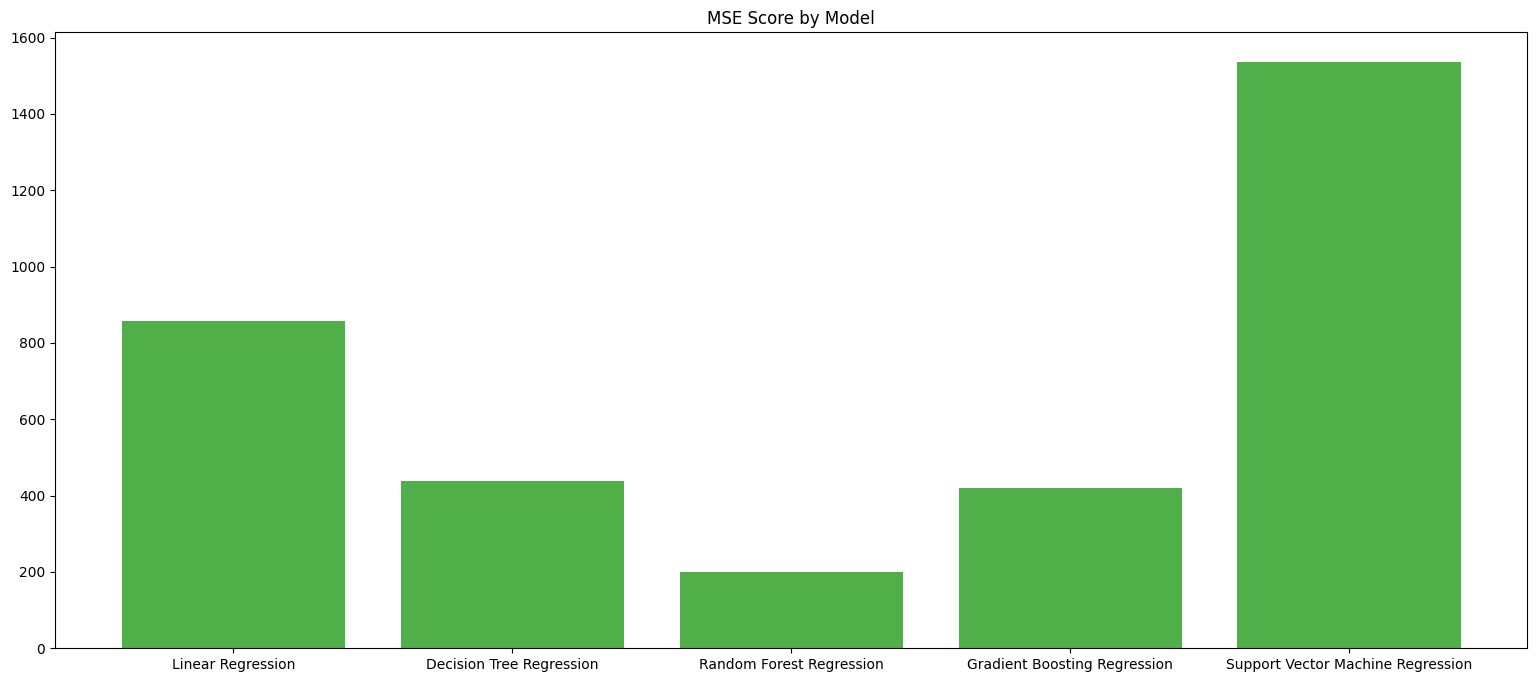

In [26]:
plt.figure(figsize=(19,8))
plt.title("MSE Score by Model")
plt.bar(model_names,mse_score,color='#50AF49')

As can be seen from the graph results, it can be seen that the random forrest regressor results are the best.</br>
Therefore, we will adopt this model for the prediction we are going to proceed from now on.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
preds = rf.predict(X_test)

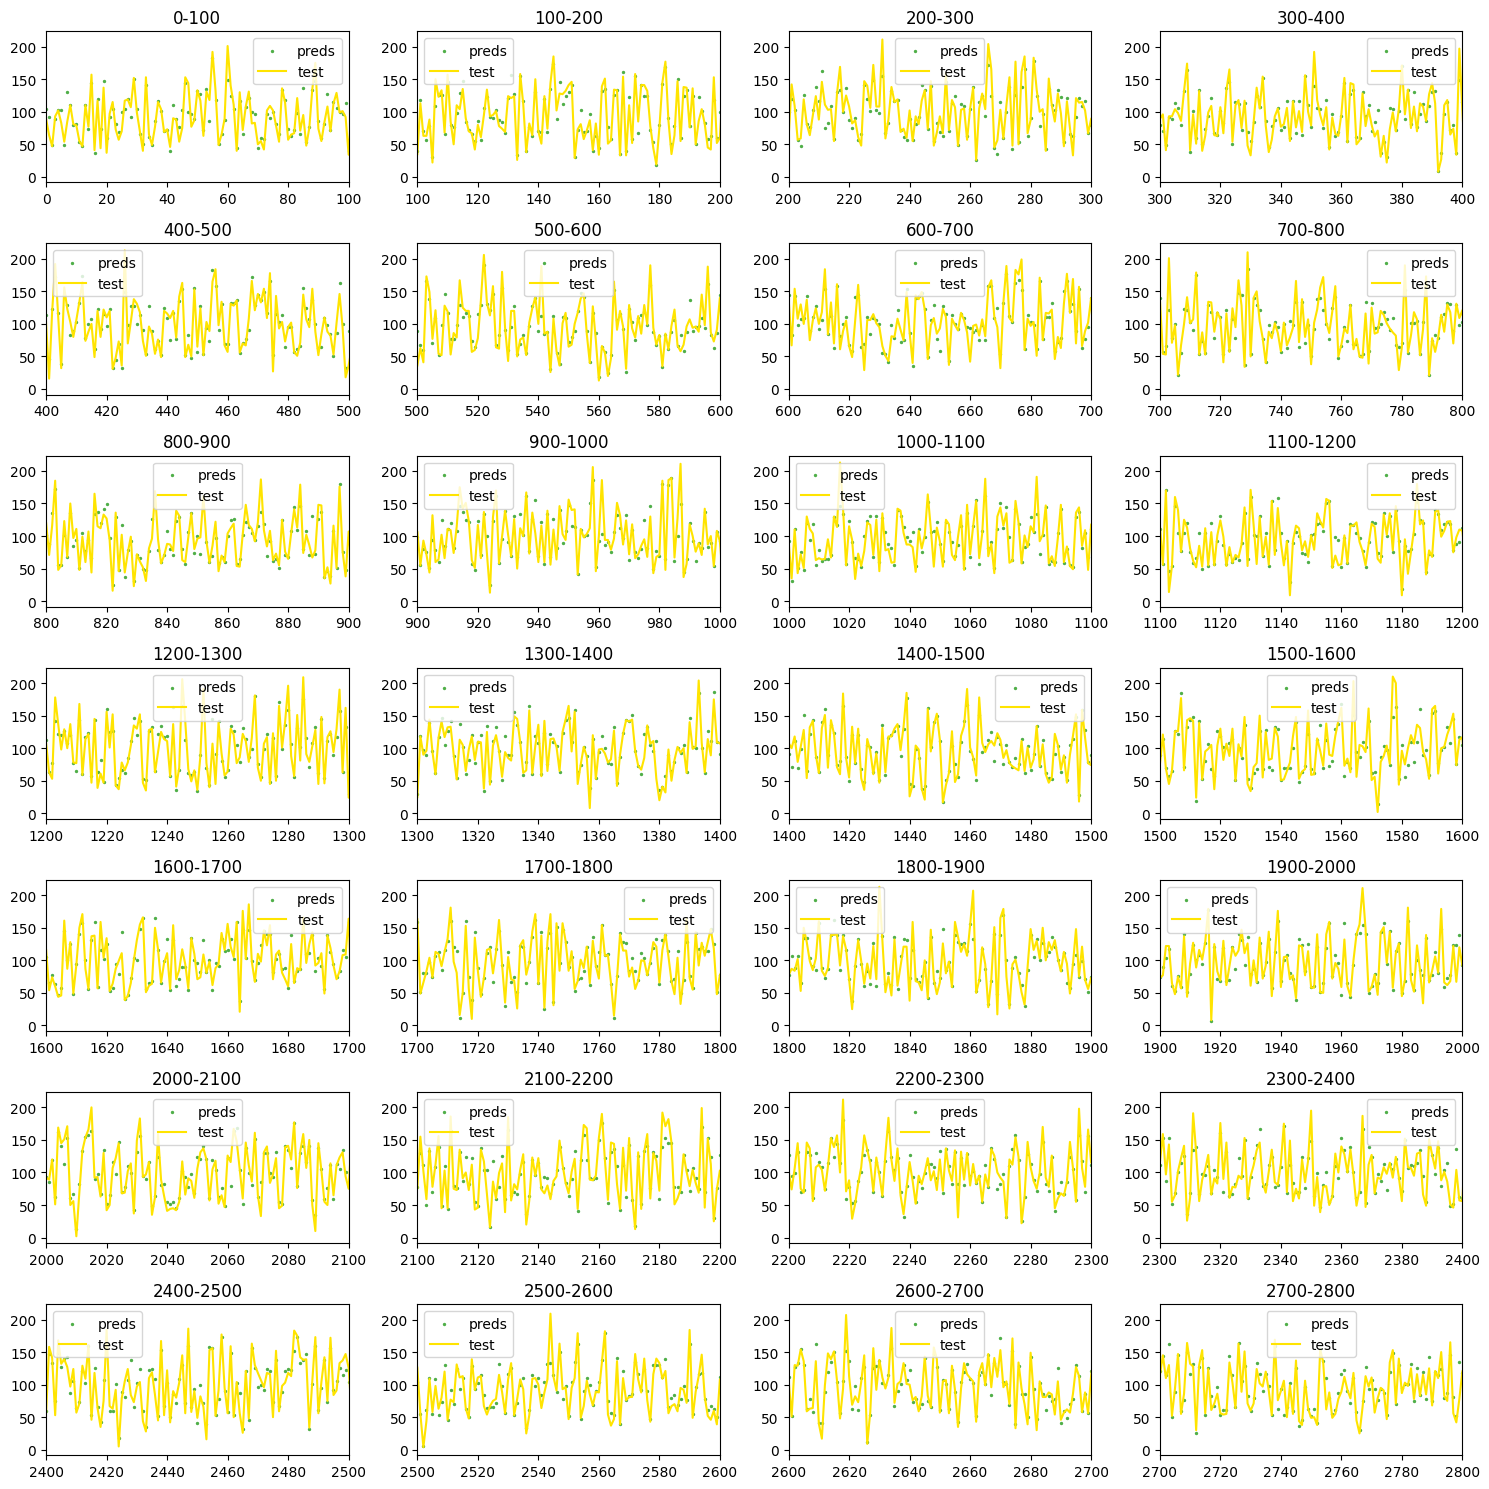

In [28]:
fig, axes = plt.subplots(7, 4, figsize=(15, 15))

for i, ax in enumerate(axes.flat):
    ax.scatter([i for i in range(len(preds))], preds, s=2, color='#50AF49')
    ax.plot([i for i in range(len(preds))], y_test, color='#FFE400')
    ax.set_xlim(i * 100, (i + 1) * 100)
    ax.set_title(f'{i*100}-{(i+1)*100}')
    ax.legend(['preds', 'test'])

plt.tight_layout()
plt.show()

#### <div style='text-align:center; font-family:arial'>🙇🏻‍♂️Thanks For Watching!</div>